# Trading Strategies powered by Machine Learning - Classification

## Logistic Regression with scikit-learn - a simple Introduction (Part 1)

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-whitegrid")

In [26]:
hours = np.array([0.5, 0.75, 1., 1.25, 1.5, 1.75, 1.75, 2.,
                  2.25, 2.5, 2.75, 3., 3.25, 3.5, 4., 4.25,
                  4.5, 4.75, 5., 5.5])

In [27]:
success = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]) 

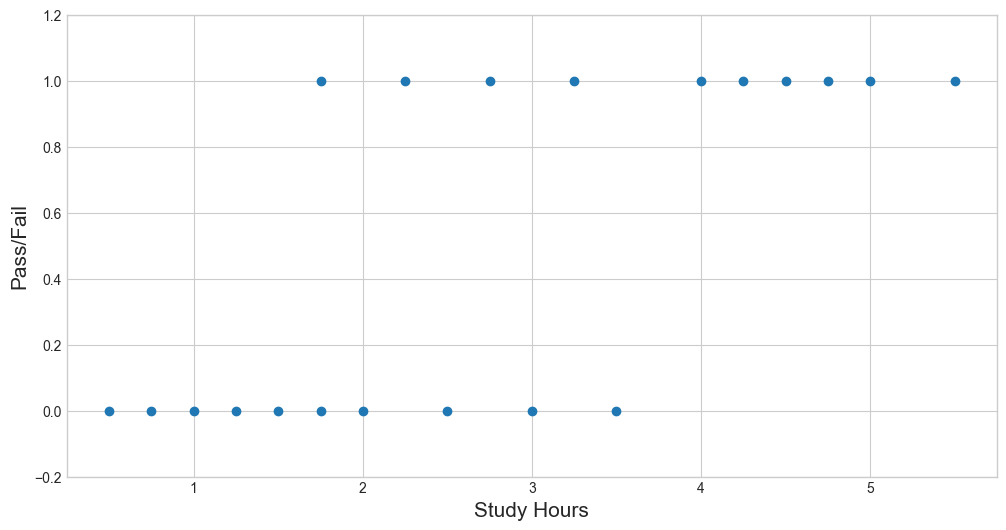

In [28]:
plt.figure(figsize=(12, 6))
plt.scatter(hours, success)
plt.xlabel("Study Hours", fontsize = 15)
plt.ylabel("Pass/Fail", fontsize = 15)
plt.ylim(-0.2, 1.2)
plt.show()

In [29]:
data = pd.DataFrame({'hours': hours, 'success': success})

In [30]:
data

,hours,success
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0
5,1.75,0
6,1.75,1
7,2.00,0
8,2.25,1
9,2.50,0


In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lm = LinearRegression(fit_intercept= True)

In [33]:
lm.fit(data.hours.to_frame(), data.success)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [34]:
lm.coef_

array([0.23459561])

In [35]:
lm.intercept_

np.float64(-0.15393526898848708)

In [36]:
data["pred"] = lm.predict(data.hours.to_frame())
data

,hours,success,pred
0,0.50,0,-0.036637
1,0.75,0,0.022011
2,1.00,0,0.080660
3,1.25,0,0.139309
4,1.50,0,0.197958
5,1.75,0,0.256607
6,1.75,1,0.256607
7,2.00,0,0.315256
8,2.25,1,0.373905
9,2.50,0,0.432554


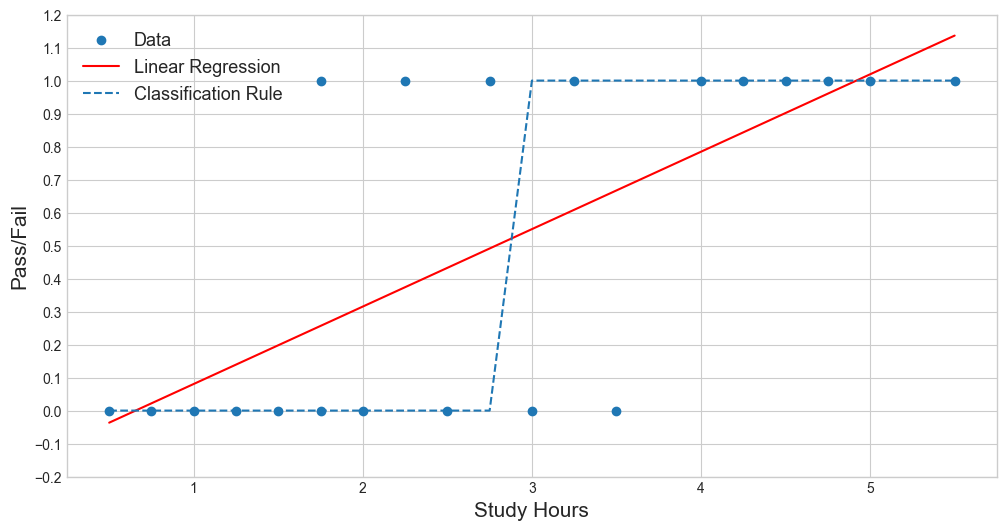

In [37]:
plt.figure(figsize=(12, 6))
plt.scatter(data.hours, data.success, label = "Data")
plt.plot(data.hours, data.pred, color = "red", label = "Linear Regression")
plt.plot(data.hours, np.where(data.pred > 0.5, 1, 0), linestyle = "--", label = "Classification Rule")
plt.legend(fontsize = 13)
plt.yticks(np.arange(-0.2, 1.3, 0.1))
plt.ylim(-0.2, 1.2)
plt.xlabel("Study Hours", fontsize = 15)
plt.ylabel("Pass/Fail", fontsize = 15)
plt.show()

## Logistic Regression with scikit-learn - a simple Introduction (Part 2)

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
lm = LogisticRegression()

In [40]:
data

,hours,success,pred
0,0.50,0,-0.036637
1,0.75,0,0.022011
2,1.00,0,0.080660
3,1.25,0,0.139309
4,1.50,0,0.197958
5,1.75,0,0.256607
6,1.75,1,0.256607
7,2.00,0,0.315256
8,2.25,1,0.373905
9,2.50,0,0.432554


In [41]:
lm.fit(data.hours.to_frame(), data.success)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [42]:
data["pred"] = lm.predict(data.hours.to_frame())
data

,hours,success,pred
0,0.50,0,0
1,0.75,0,0
2,1.00,0,0
3,1.25,0,0
4,1.50,0,0
5,1.75,0,0
6,1.75,1,0
7,2.00,0,0
8,2.25,1,0
9,2.50,0,0


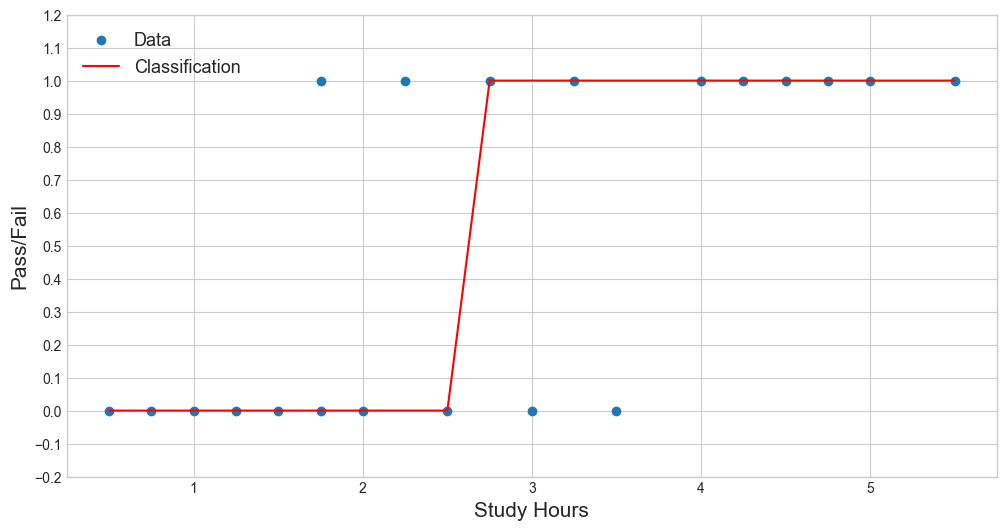

In [43]:
plt.figure(figsize=(12, 6))
plt.scatter(data.hours, data.success, label = "Data")
plt.plot(data.hours, data.pred, color = "red", label = "Classification")
plt.legend(fontsize = 13)
plt.yticks(np.arange(-0.2, 1.3, 0.1))
plt.ylim(-0.2, 1.2)
plt.xlabel("Study Hours", fontsize = 15)
plt.ylabel("Pass/Fail", fontsize = 15)
plt.show()

In [44]:
proba = lm.predict_proba(data.hours.to_frame())
proba

array([[0.92861721, 0.07138279],
       [0.90707537, 0.09292463],
       [0.87987361, 0.12012639],
       [0.84606045, 0.15393955],
       [0.80484065, 0.19515935],
       [0.75576968, 0.24423032],
       [0.75576968, 0.24423032],
       [0.69897507, 0.30102493],
       [0.63534559, 0.36465441],
       [0.56660579, 0.43339421],
       [0.49520342, 0.50479658],
       [0.42399618, 0.57600382],
       [0.35581092, 0.64418908],
       [0.2930129 , 0.7069871 ],
       [0.18920231, 0.81079769],
       [0.14900776, 0.85099224],
       [0.11612919, 0.88387081],
       [0.08974025, 0.91025975],
       [0.06888056, 0.93111944],
       [0.03998596, 0.96001404]])

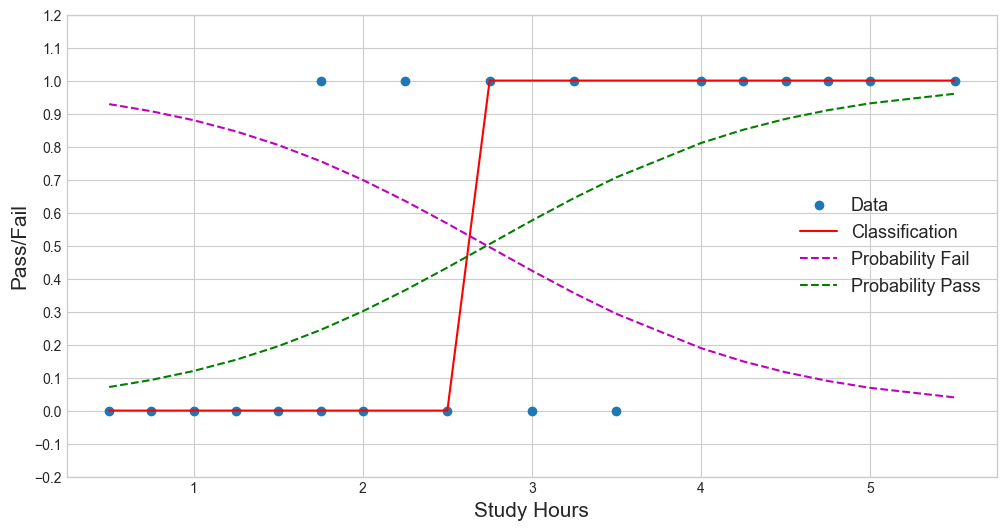

In [45]:
plt.figure(figsize=(12, 6))
plt.scatter(data.hours, data.success, label = "Data")
plt.plot(data.hours, data.pred, color = "red", label = "Classification")
plt.plot(data.hours, proba[:, 0], "m--", label = "Probability Fail")
plt.plot(data.hours, proba[:, 1], "g--", label = "Probability Pass")
plt.legend(fontsize = 13)
plt.yticks(np.arange(-0.2, 1.3, 0.1))
plt.ylim(-0.2, 1.2)
plt.xlabel("Study Hours", fontsize = 15)
plt.ylabel("Pass/Fail", fontsize = 15)
plt.show()

## Getting and Preparing the Data

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-whitegrid")

In [47]:
data = pd.read_csv("five_minute.csv", parse_dates = ["time"], index_col = "time")

In [48]:
data["returns"] = np.log(data.div(data.shift(1)))

In [49]:
data.dropna(inplace = True)

In [50]:
data["direction"] = np.sign(data.returns)

In [51]:
data

,price,returns,direction
time,,,
2019-01-01 22:05:00+00:00,1.146350,-0.000201,-1.0
2019-01-01 22:10:00+00:00,1.146320,-0.000026,-1.0
2019-01-01 22:15:00+00:00,1.146320,0.000000,0.0
2019-01-01 22:20:00+00:00,1.146530,0.000183,1.0
2019-01-01 22:25:00+00:00,1.146475,-0.000048,-1.0
...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-1.0
2019-12-30 23:40:00+00:00,1.120210,0.000027,1.0
2019-12-30 23:45:00+00:00,1.120295,0.000076,1.0


In [52]:
data.direction.value_counts()

direction
 1.0    36058
-1.0    35702
 0.0     1959
Name: count, dtype: int64

In [53]:
lags = 5

In [54]:
cols = []
for lag in range(1, lags + 1):
    col = "lag{}".format(lag)
    data[col] = data.returns.shift(lag)
    cols.append(col)
data.dropna(inplace = True)

In [55]:
data

,price,returns,direction,lag1,lag2,lag3,lag4,lag5
time,,,,,,,,
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-1.0,-0.000048,0.000183,0.000000,-0.000026,-0.000201
2019-01-01 22:35:00+00:00,1.146455,0.000000,0.0,-0.000017,-0.000048,0.000183,0.000000,-0.000026
2019-01-01 22:40:00+00:00,1.146370,-0.000074,-1.0,0.000000,-0.000017,-0.000048,0.000183,0.000000
2019-01-01 22:45:00+00:00,1.146315,-0.000048,-1.0,-0.000074,0.000000,-0.000017,-0.000048,0.000183
2019-01-01 22:50:00+00:00,1.146475,0.000140,1.0,-0.000048,-0.000074,0.000000,-0.000017,-0.000048
...,...,...,...,...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-1.0,-0.000112,-0.000018,0.000022,-0.000004,0.000089
2019-12-30 23:40:00+00:00,1.120210,0.000027,1.0,-0.000004,-0.000112,-0.000018,0.000022,-0.000004
2019-12-30 23:45:00+00:00,1.120295,0.000076,1.0,0.000027,-0.000004,-0.000112,-0.000018,0.000022


## Predicting Market Direction with Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
lm = LogisticRegression(C = 1e6, max_iter = 100000, multi_class = "ovr")

In [58]:
lm.fit(data[cols], data.direction)

F:\algo-trading-env\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1273: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1000000.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100000
,multi_class,'ovr'


In [59]:
data["pred"] = lm.predict(data[cols])

In [60]:
data

,price,returns,direction,lag1,lag2,lag3,lag4,lag5,pred
time,,,,,,,,,
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-1.0,-0.000048,0.000183,0.000000,-0.000026,-0.000201,1.0
2019-01-01 22:35:00+00:00,1.146455,0.000000,0.0,-0.000017,-0.000048,0.000183,0.000000,-0.000026,1.0
2019-01-01 22:40:00+00:00,1.146370,-0.000074,-1.0,0.000000,-0.000017,-0.000048,0.000183,0.000000,1.0
2019-01-01 22:45:00+00:00,1.146315,-0.000048,-1.0,-0.000074,0.000000,-0.000017,-0.000048,0.000183,1.0
2019-01-01 22:50:00+00:00,1.146475,0.000140,1.0,-0.000048,-0.000074,0.000000,-0.000017,-0.000048,1.0
...,...,...,...,...,...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-1.0,-0.000112,-0.000018,0.000022,-0.000004,0.000089,1.0
2019-12-30 23:40:00+00:00,1.120210,0.000027,1.0,-0.000004,-0.000112,-0.000018,0.000022,-0.000004,1.0
2019-12-30 23:45:00+00:00,1.120295,0.000076,1.0,0.000027,-0.000004,-0.000112,-0.000018,0.000022,1.0


In [61]:
data.pred.value_counts()

pred
1.0    73714
Name: count, dtype: int64

In [62]:
hits = np.sign(data.direction * data.pred).value_counts()

In [63]:
hits

 1.0    36057
-1.0    35699
 0.0     1958
Name: count, dtype: int64

In [64]:
hit_ratio = hits[1.0] / sum(hits)
hit_ratio

np.float64(0.48914724475676263)

In [65]:
from sklearn.metrics import accuracy_score

In [66]:
accuracy_score(y_true = data.direction, y_pred = data.pred)

0.48914724475676263

## In-Sample Backtesting and the Look-ahead-bias

In [67]:
data

,price,returns,direction,lag1,lag2,lag3,lag4,lag5,pred
time,,,,,,,,,
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-1.0,-0.000048,0.000183,0.000000,-0.000026,-0.000201,1.0
2019-01-01 22:35:00+00:00,1.146455,0.000000,0.0,-0.000017,-0.000048,0.000183,0.000000,-0.000026,1.0
2019-01-01 22:40:00+00:00,1.146370,-0.000074,-1.0,0.000000,-0.000017,-0.000048,0.000183,0.000000,1.0
2019-01-01 22:45:00+00:00,1.146315,-0.000048,-1.0,-0.000074,0.000000,-0.000017,-0.000048,0.000183,1.0
2019-01-01 22:50:00+00:00,1.146475,0.000140,1.0,-0.000048,-0.000074,0.000000,-0.000017,-0.000048,1.0
...,...,...,...,...,...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-1.0,-0.000112,-0.000018,0.000022,-0.000004,0.000089,1.0
2019-12-30 23:40:00+00:00,1.120210,0.000027,1.0,-0.000004,-0.000112,-0.000018,0.000022,-0.000004,1.0
2019-12-30 23:45:00+00:00,1.120295,0.000076,1.0,0.000027,-0.000004,-0.000112,-0.000018,0.000022,1.0


In [68]:
data["strategy"] = data.pred * data.returns

In [69]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

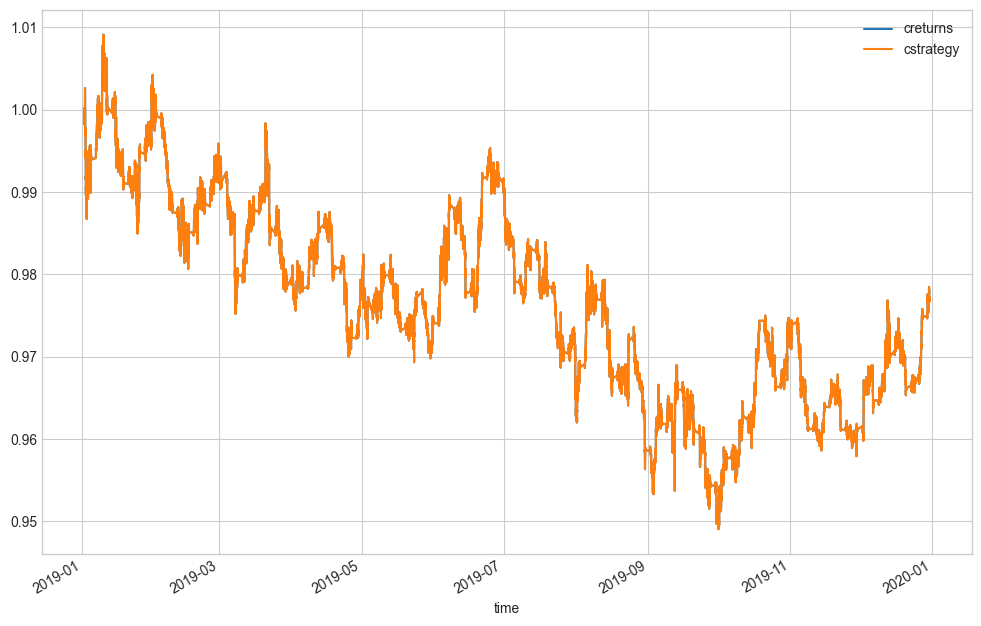

In [70]:
data[["creturns", "cstrategy"]].plot(figsize = (12 , 8))
plt.show()

In [71]:
data["trades"] = data.pred.diff().fillna(0).abs()

In [72]:
data.trades.value_counts()

trades
0.0    73714
Name: count, dtype: int64

In [73]:
data

,price,returns,direction,lag1,lag2,lag3,lag4,lag5,pred,strategy,creturns,cstrategy,trades
time,,,,,,,,,,,,,
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-1.0,-0.000048,0.000183,0.000000,-0.000026,-0.000201,1.0,-0.000017,0.999983,0.999983,0.0
2019-01-01 22:35:00+00:00,1.146455,0.000000,0.0,-0.000017,-0.000048,0.000183,0.000000,-0.000026,1.0,0.000000,0.999983,0.999983,0.0
2019-01-01 22:40:00+00:00,1.146370,-0.000074,-1.0,0.000000,-0.000017,-0.000048,0.000183,0.000000,1.0,-0.000074,0.999908,0.999908,0.0
2019-01-01 22:45:00+00:00,1.146315,-0.000048,-1.0,-0.000074,0.000000,-0.000017,-0.000048,0.000183,1.0,-0.000048,0.999860,0.999860,0.0
2019-01-01 22:50:00+00:00,1.146475,0.000140,1.0,-0.000048,-0.000074,0.000000,-0.000017,-0.000048,1.0,0.000140,1.000000,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-1.0,-0.000112,-0.000018,0.000022,-0.000004,0.000089,1.0,-0.000004,0.977064,0.977064,0.0
2019-12-30 23:40:00+00:00,1.120210,0.000027,1.0,-0.000004,-0.000112,-0.000018,0.000022,-0.000004,1.0,0.000027,0.977091,0.977091,0.0
2019-12-30 23:45:00+00:00,1.120295,0.000076,1.0,0.000027,-0.000004,-0.000112,-0.000018,0.000022,1.0,0.000076,0.977165,0.977165,0.0


## Out-Sample Forward Testing

In [74]:
data = pd.read_csv("test_set.csv", parse_dates = ["time"], index_col = "time")

In [75]:
data

,price
time,
2020-01-01 22:00:00+00:00,1.121325
2020-01-01 22:05:00+00:00,1.121250
2020-01-01 22:10:00+00:00,1.121250
2020-01-01 22:15:00+00:00,1.121460
2020-01-01 22:20:00+00:00,1.121540
...,...
2020-08-30 23:35:00+00:00,1.190895
2020-08-30 23:40:00+00:00,1.191240
2020-08-30 23:45:00+00:00,1.191515


In [76]:
data["returns"] = np.log(data.div(data.shift(1)))

In [77]:
data["direction"] = np.sign(data.returns)

In [78]:
data

,price,returns,direction
time,,,
2020-01-01 22:00:00+00:00,1.121325,NaN,NaN
2020-01-01 22:05:00+00:00,1.121250,-0.000067,-1.0
2020-01-01 22:10:00+00:00,1.121250,0.000000,0.0
2020-01-01 22:15:00+00:00,1.121460,0.000187,1.0
2020-01-01 22:20:00+00:00,1.121540,0.000071,1.0
...,...,...,...
2020-08-30 23:35:00+00:00,1.190895,-0.000080,-1.0
2020-08-30 23:40:00+00:00,1.191240,0.000290,1.0
2020-08-30 23:45:00+00:00,1.191515,0.000231,1.0


In [79]:
lags = 5

In [80]:
cols = []
for lag in range(1, lags + 1):
    col = "lag{}".format(lag)
    data[col] = data.returns.shift(lag)
    cols.append(col)
data.dropna(inplace = True)

In [81]:
data

,price,returns,direction,lag1,lag2,lag3,lag4,lag5
time,,,,,,,,
2020-01-01 22:40:00+00:00,1.121520,0.000004,1.0,-0.000022,0.000071,0.000187,0.000000,-0.000067
2020-01-01 22:45:00+00:00,1.121555,0.000031,1.0,0.000004,-0.000022,0.000071,0.000187,0.000000
2020-01-01 22:50:00+00:00,1.121550,-0.000004,-1.0,0.000031,0.000004,-0.000022,0.000071,0.000187
2020-01-01 22:55:00+00:00,1.121515,-0.000031,-1.0,-0.000004,0.000031,0.000004,-0.000022,0.000071
2020-01-01 23:00:00+00:00,1.121915,0.000357,1.0,-0.000031,-0.000004,0.000031,0.000004,-0.000022
...,...,...,...,...,...,...,...,...
2020-08-30 23:35:00+00:00,1.190895,-0.000080,-1.0,-0.000092,0.000298,0.000046,0.000000,-0.000151
2020-08-30 23:40:00+00:00,1.191240,0.000290,1.0,-0.000080,-0.000092,0.000298,0.000046,0.000000
2020-08-30 23:45:00+00:00,1.191515,0.000231,1.0,0.000290,-0.000080,-0.000092,0.000298,0.000046


In [82]:
data["pred"] = lm.predict(data[cols])

In [83]:
data

,price,returns,direction,lag1,lag2,lag3,lag4,lag5,pred
time,,,,,,,,,
2020-01-01 22:40:00+00:00,1.121520,0.000004,1.0,-0.000022,0.000071,0.000187,0.000000,-0.000067,1.0
2020-01-01 22:45:00+00:00,1.121555,0.000031,1.0,0.000004,-0.000022,0.000071,0.000187,0.000000,1.0
2020-01-01 22:50:00+00:00,1.121550,-0.000004,-1.0,0.000031,0.000004,-0.000022,0.000071,0.000187,1.0
2020-01-01 22:55:00+00:00,1.121515,-0.000031,-1.0,-0.000004,0.000031,0.000004,-0.000022,0.000071,1.0
2020-01-01 23:00:00+00:00,1.121915,0.000357,1.0,-0.000031,-0.000004,0.000031,0.000004,-0.000022,1.0
...,...,...,...,...,...,...,...,...,...
2020-08-30 23:35:00+00:00,1.190895,-0.000080,-1.0,-0.000092,0.000298,0.000046,0.000000,-0.000151,1.0
2020-08-30 23:40:00+00:00,1.191240,0.000290,1.0,-0.000080,-0.000092,0.000298,0.000046,0.000000,1.0
2020-08-30 23:45:00+00:00,1.191515,0.000231,1.0,0.000290,-0.000080,-0.000092,0.000298,0.000046,1.0


In [84]:
data.pred.value_counts()

pred
1.0    49361
Name: count, dtype: int64

In [85]:
hits = np.sign(data.direction * data.pred).value_counts()

In [86]:
hits

 1.0    24714
-1.0    24035
 0.0      612
Name: count, dtype: int64

In [87]:
hit_ratio = hits[1.0] / sum(hits)
hit_ratio

np.float64(0.5006786734466482)

In [88]:
data["strategy"] = data.pred * data.returns

In [89]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

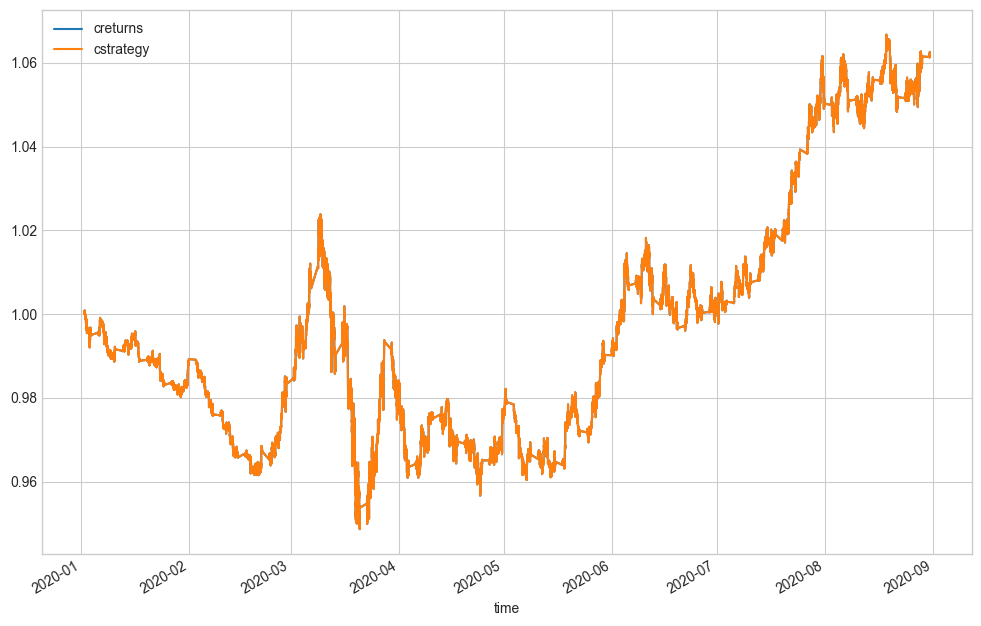

In [90]:
data[["creturns", "cstrategy"]].plot(figsize = (12 , 8))
plt.show()

In [91]:
data["trades"] = data.pred.diff().fillna(0).abs()

In [92]:
data.trades.value_counts()

trades
0.0    49361
Name: count, dtype: int64

In [93]:
data

,price,returns,direction,lag1,lag2,lag3,lag4,lag5,pred,strategy,creturns,cstrategy,trades
time,,,,,,,,,,,,,
2020-01-01 22:40:00+00:00,1.121520,0.000004,1.0,-0.000022,0.000071,0.000187,0.000000,-0.000067,1.0,0.000004,1.000004,1.000004,0.0
2020-01-01 22:45:00+00:00,1.121555,0.000031,1.0,0.000004,-0.000022,0.000071,0.000187,0.000000,1.0,0.000031,1.000036,1.000036,0.0
2020-01-01 22:50:00+00:00,1.121550,-0.000004,-1.0,0.000031,0.000004,-0.000022,0.000071,0.000187,1.0,-0.000004,1.000031,1.000031,0.0
2020-01-01 22:55:00+00:00,1.121515,-0.000031,-1.0,-0.000004,0.000031,0.000004,-0.000022,0.000071,1.0,-0.000031,1.000000,1.000000,0.0
2020-01-01 23:00:00+00:00,1.121915,0.000357,1.0,-0.000031,-0.000004,0.000031,0.000004,-0.000022,1.0,0.000357,1.000357,1.000357,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-30 23:35:00+00:00,1.190895,-0.000080,-1.0,-0.000092,0.000298,0.000046,0.000000,-0.000151,1.0,-0.000080,1.061863,1.061863,0.0
2020-08-30 23:40:00+00:00,1.191240,0.000290,1.0,-0.000080,-0.000092,0.000298,0.000046,0.000000,1.0,0.000290,1.062170,1.062170,0.0
2020-08-30 23:45:00+00:00,1.191515,0.000231,1.0,0.000290,-0.000080,-0.000092,0.000298,0.000046,1.0,0.000231,1.062416,1.062416,0.0
